# Import libraries.

In [54]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# This is Jupyter notebooks magic command. This keeps visualization within the notebook.
%matplotlib inline

# First read all the data from URL

In [55]:
import urllib
from urllib.request import urlretrieve

url = 'http://lib.stat.cmu.edu/datasets/boston'
urlretrieve(url, 'boston.txt')

data = []
with open('boston.txt', 'r') as file:
    for line in file:
        row = line.split()
        if len(data) == 0:
            data.append(row[:14])
        elif len(data[-1]) < 14:
            data[-1].extend(row[:14-len(data[-1])])
        else:
            data.append(row[:14])

df_web = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
print(df_web.shape)
df_web.head(25)

(515, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,The,Boston,house-price,data,of,"Harrison,",D.,and,"Rubinfeld,",D.L.,'Hedonic,prices,and,the
1,"vol.5,","81-102,",1978.,Used,in,"Belsley,",Kuh,&,"Welsch,",'Regression,diagnostics,"...',","Wiley,",1980.
2,pages,244-261,of,the,latter.,Variables,in,order:,CRIM,per,capita,crime,rate,by
3,ZN,proportion,of,residential,land,zoned,for,lots,over,"25,000",sq.ft.,INDUS,proportion,of
4,CHAS,Charles,River,dummy,variable,(=,1,if,tract,bounds,river;,0,otherwise),NOX
5,RM,average,number,of,rooms,per,dwelling,AGE,proportion,of,owner-occupied,units,built,prior
6,DIS,weighted,distances,to,five,Boston,employment,centres,RAD,index,of,accessibility,to,radial
7,TAX,full-value,property-tax,rate,per,"$10,000",PTRATIO,pupil-teacher,ratio,by,town,B,1000(Bk,-
8,LSTAT,%,lower,status,of,the,population,MEDV,Median,value,of,owner-occupied,homes,in
9,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00


## Since the above dataframe has 9 rows that is not data, let's delete those rows and create a new dataframe called "boston_housing"

In [56]:
# Create a new DataFrame with rows 9 to the end of table-1
boston_housing = df_web.iloc[9:, :].reset_index(drop=True)

# Print the shape of the new DataFrame
boston_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67,22.40
502,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08,20.60
503,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64,23.90
504,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48,22.00


# Print columns name.

In [57]:
list(boston_housing.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [58]:
# Rename column names.

In [59]:
fixed_columns = {    
    'CRIM':'crime_rate_by_town',
    'ZN':'residental_land_zoned_over_25000SQ_ft',
    'INDUS':'non_retail_business_acres_per_town',
    'CHAS':'Charles_River_dummy_variable (1 if tract bounds river; 0 otherwise)',
    'NOX':'nitric_oxides_concentration (parts per 10 million)',
    'RM':'avg_num_of_rooms_per_dwelling',
    'AGE':'owner_occupied_units_built_prior_to_1940', 
    'DIS':'distances_to_five_Boston_employment_centres',
    'RAD':'index_of_accessibility_to_radial_highways',
    'TAX':'full-value_property-tax_rate_per_$10K',
    'PTRATIO':'student_teacher_ratio_by_town', 
    'B':'1000(AA-0.63)^2_where_AA_is_the_proportion_of_Afri-Ameri_by_town',
    'LSTAT':'%_lower_status_of_the_population',
    'MEDV':"Median_value_of_owner-occupied_homes_in_$1000's"
}

boston_housing.rename(columns=fixed_columns,inplace=True)
boston_housing.columns

Index(['crime_rate_by_town', 'residental_land_zoned_over_25000SQ_ft',
       'non_retail_business_acres_per_town',
       'Charles_River_dummy_variable (1 if tract bounds river; 0 otherwise)',
       'nitric_oxides_concentration (parts per 10 million)',
       'avg_num_of_rooms_per_dwelling',
       'owner_occupied_units_built_prior_to_1940',
       'distances_to_five_Boston_employment_centres',
       'index_of_accessibility_to_radial_highways',
       'full-value_property-tax_rate_per_$10K',
       'student_teacher_ratio_by_town',
       '1000(AA-0.63)^2_where_AA_is_the_proportion_of_Afri-Ameri_by_town',
       '%_lower_status_of_the_population',
       'Median_value_of_owner-occupied_homes_in_$1000's'],
      dtype='object')

# Print dataframe with renamed columns

In [60]:
boston_housing

,crime_rate_by_town,residental_land_zoned_over_25000SQ_ft,non_retail_business_acres_per_town,Charles_River_dummy_variable (1 if tract bounds river; 0 otherwise),nitric_oxides_concentration (parts per 10 million),avg_num_of_rooms_per_dwelling,owner_occupied_units_built_prior_to_1940,distances_to_five_Boston_employment_centres,index_of_accessibility_to_radial_highways,full-value_property-tax_rate_per_$10K,student_teacher_ratio_by_town,1000(AA-0.63)^2_where_AA_is_the_proportion_of_Afri-Ameri_by_town,%_lower_status_of_the_population,Median_value_of_owner-occupied_homes_in_$1000's
0,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
1,0.02731,0.00,7.070,0,0.4690,6.4210,78.90,4.9671,2,242.0,17.80,396.90,9.14,21.60
2,0.02729,0.00,7.070,0,0.4690,7.1850,61.10,4.9671,2,242.0,17.80,392.83,4.03,34.70
3,0.03237,0.00,2.180,0,0.4580,6.9980,45.80,6.0622,3,222.0,18.70,394.63,2.94,33.40
4,0.06905,0.00,2.180,0,0.4580,7.1470,54.20,6.0622,3,222.0,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00,11.930,0,0.5730,6.5930,69.10,2.4786,1,273.0,21.00,391.99,9.67,22.40
502,0.04527,0.00,11.930,0,0.5730,6.1200,76.70,2.2875,1,273.0,21.00,396.90,9.08,20.60
503,0.06076,0.00,11.930,0,0.5730,6.9760,91.00,2.1675,1,273.0,21.00,396.90,5.64,23.90
504,0.10959,0.00,11.930,0,0.5730,6.7940,89.30,2.3889,1,273.0,21.00,393.45,6.48,22.00


# check dataframe for null value.

In [61]:
boston_housing.isnull().sum()

crime_rate_by_town                                                     0
residental_land_zoned_over_25000SQ_ft                                  0
non_retail_business_acres_per_town                                     0
Charles_River_dummy_variable (1 if tract bounds river; 0 otherwise)    0
nitric_oxides_concentration (parts per 10 million)                     0
avg_num_of_rooms_per_dwelling                                          0
owner_occupied_units_built_prior_to_1940                               0
distances_to_five_Boston_employment_centres                            0
index_of_accessibility_to_radial_highways                              0
full-value_property-tax_rate_per_$10K                                  0
student_teacher_ratio_by_town                                          0
1000(AA-0.63)^2_where_AA_is_the_proportion_of_Afri-Ameri_by_town       0
%_lower_status_of_the_population                                       0
Median_value_of_owner-occupied_homes_in_$1000's    

# Check unique values in column.

In [62]:
boston_housing.avg_num_of_rooms_per_dwelling.unique()

array(['6.5750', '6.4210', '7.1850', '6.9980', '7.1470', '6.4300',
       '6.0120', '6.1720', '5.6310', '6.0040', '6.3770', '6.0090',
       '5.8890', '5.9490', '6.0960', '5.8340', '5.9350', '5.9900',
       '5.4560', '5.7270', '5.5700', '5.9650', '6.1420', '5.8130',
       '5.9240', '5.5990', '6.0470', '6.4950', '6.6740', '5.7130',
       '6.0720', '5.9500', '5.7010', '5.9330', '5.8410', '5.8500',
       '5.9660', '6.5950', '7.0240', '6.7700', '6.1690', '6.2110',
       '6.0690', '5.6820', '5.7860', '6.0300', '5.3990', '5.6020',
       '5.9630', '6.1150', '6.5110', '5.9980', '5.8880', '7.2490',
       '6.3830', '6.8160', '6.1450', '5.9270', '5.7410', '6.4560',
       '6.7620', '7.1040', '6.2900', '5.7870', '5.8780', '5.5940',
       '5.8850', '6.4170', '5.9610', '6.0650', '6.2450', '6.2730',
       '6.2860', '6.2790', '6.1400', '6.2320', '5.8740', '6.7270',
       '6.6190', '6.3020', '6.1670', '6.3890', '6.6300', '6.0150',
       '6.1210', '7.0070', '7.0790', '6.4050', '6.4420', '6.24

# Display 5 rows with lowest crime rate and their median home values.

In [63]:
# Convert column crime_rate_by_town to numeric type
boston_housing['crime_rate_by_town'] = pd.to_numeric(boston_housing['crime_rate_by_town'])

# Display the rows with lowest crime rate and median home value
lowest_crime = boston_housing.nsmallest(5, 'crime_rate_by_town')
crimerate_homevalue = lowest_crime[['crime_rate_by_town', "Median_value_of_owner-occupied_homes_in_$1000's"]]
print(crimerate_homevalue)

     crime_rate_by_town Median_value_of_owner-occupied_homes_in_$1000's
0               0.00632                                           24.00
284             0.00906                                           32.20
285             0.01096                                           22.00
341             0.01301                                           32.70
55              0.01311                                           35.40


# Some visualization.

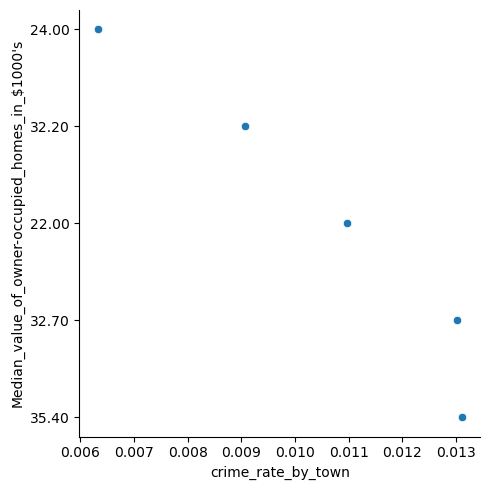

In [64]:
sns.relplot(x = "crime_rate_by_town", y = "Median_value_of_owner-occupied_homes_in_$1000's", data = crimerate_homevalue)
#plt.show()

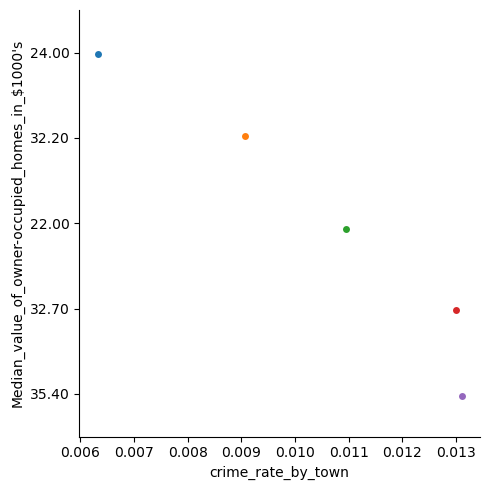

In [65]:
sns.catplot(x = "crime_rate_by_town", y = "Median_value_of_owner-occupied_homes_in_$1000's", data = crimerate_homevalue)
#plt.show()